<h2>Caveat</h2>
Web sites often change the format of their pages so this may not always work. If it doesn't, rework the examples after examining the html content of the page (most browsers will let you see the html source - look for a "page source" option - though you might have to turn on the developer mode in your browser preferences. For example, on Chrome you need to click the "developer mode" check box under Extensions in the Preferences/Options menu. 

<h1>Scraping web pages</h1>
<li>Most data that resides on the web is in HTML 
<li>HTML: HyperText Markup Language
<li>An html web page is a structured document
<li>We can exploit this structure to extract data from the page

<li>Learn html and css at <a href="https://www.khanacademy.org/computing/computer-programming/html-css">this site</a>

<b>Web scraping</b>: Automating the process of extracting information from web pages<br>
<li>for data collection and analysis
<li>for incorporating in a web app 

<h2>Python libraries for web scraping</h2>
<li><b>requests</b> for handling the request-response cycle
<li><b>beautifulsoup4</b> for extracting data from an html string
<li><b>selenium</b> for extracting data from an html string and managing the response process, particularly when a page contains JavaScript or when a button needs to be clicked

<h2>Beautiful Soup</h2>
<li>html and xml parser
<li>makes use of formatted html tags and css properties to extract data
<li>https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<h2>Web scraping using beautifulsoup4</h2>

<h3>Import necessary modules</h3>

In [5]:
import requests
from bs4 import BeautifulSoup

<h3>The http request response cycle</h3>

In [6]:
url = "http://www.epicurious.com/search/Tofu Chili"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [7]:
keywords = input("Please enter the things you want to see in a recipe")
url = "http://www.epicurious.com/search/" + keywords
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

KeyboardInterrupt: 

<h3>Set up the BeautifulSoup object</h3>

In [9]:
results_page = BeautifulSoup(response.content,'lxml')
print(results_page.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="app-id=312101965" name="apple-itunes-app"/>
  <title>
   Search | Epicurious.com
  </title>
  <link href="//assets.adobedtm.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//static.parsely.com" rel="dns-prefetch"/>
  <link href="//condenast.demdex.net" rel="dns-prefetch"/>
  <link href="//capture.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//pixel.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//use.typekit.net" rel="dns-prefetch"/>
  <link href="//fonts.typekit.net" rel="dns-prefetch"/>
  <link href="//p.typekit.net" rel="dns-prefetch"/>
  <link href="//assets.epicurious.com" rel="dns-prefetch"/>
  <link href="//ad.doubleclick.net" rel="dns-prefetch"/>
  <link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//z.moatads.com" rel="dns-prefetch

<h3>BS4 functions</h3>

<h4>find_all finds all instances of a specified tag</h4>
<h4>returns a result_set (a list)</h4>

In [10]:
all_a_tags = results_page.find_all('a')
print(type(all_a_tags))

<class 'bs4.element.ResultSet'>


In [11]:
all_a_tags

[<a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a>,
 <a data-reactid="72" href="/recipes-menus/weekly-meal-plan-shawarma-chicken-herby-tuna-pasta-and-mapo-tofu-article">Weekly Meal Plan: June 4–8</a>,
 <a class="photo-link" data-reactid="74" href="/recipes-menus/weekly-meal-plan-shawarma-chicken-herby-tuna-pasta-and-mapo-tofu-article"><div class="photo-wrap" data-reactid="75"><div class="component-lazy pending" data-component="Lazy" data-reactid="76"></div></div></a>,
 <a class="view-complete-item" data-reactid="77" href="/recipes-menus/weekly-meal-plan-shawarma-chicken-herby-tuna-pasta-and-mapo-tofu-article" itemprop="url" title="Weekly Meal Plan: June 4–8"><!-- react-text: 78 -->View “<!-- /react-text --><!-- react-text: 79 -->Weekly Meal Plan: June 4–8<!-- /react-text --><!-- react-text: 80 -->”<!-- /react-text --></a>,
 <a data-reactid="85" href="/recipes-menus/weekly-meal-plan-5-family-friendly-vegetarian-dinners-article">Weekly Meal Plan: October 15–19

<h4>find finds the first instance of a specified tag</h4>
<h4>returns a bs4 element</h4>


In [12]:
div_tag = results_page.find('div')
print(div_tag)

<div class="header-wrapper" data-reactid="2"><div class="header" data-reactid="3" role="banner"><h2 data-reactid="4" itemtype="https://schema.org/Organization"><a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a></h2><div class="search-form-container" data-reactid="6"><form action="/search/" autocomplete="off" data-reactid="7" method="get" role="search"><fieldset data-reactid="8"><button class="submit" data-reactid="9" type="submit">search</button><input autocomplete="off" data-reactid="10" maxlength="120" name="terms" placeholder="Find a Recipe" type="text" value="Tofu Chili"/><button class="filter mobile" data-reactid="11">filters</button><button class="filter tablet" data-reactid="12">filter results</button></fieldset></form><div class="ingredient-filters" data-reactid="13"><h3 data-reactid="14">Include/Exclude Ingredients</h3><form class="include-ingredients" data-reactid="15"><fieldset data-reactid="16"><input aria-label="Include ingredients" data-reactid=

In [ ]:
type(div_tag)


<h4>bs4 functions can be recursively applied on elements</h4>

In [13]:
div_tag.find('a')

<a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a>

<h4>Both find as well as find_all can be qualified by css selectors</h4>
<li>using selector=value
<li>using a dictionary

<h4>Using selector=value</h4>

In [14]:
#When using this method and looking for 'class' use 'class_' (because class is a reserved word in python)
#Note that we get a list back because find_all returns a list
results_page.find_all('article',class_="recipe-content-card")

[<article class="recipe-content-card" data-has-quickview="false" data-index="13" data-reactid="237" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="238"><strong class="tag" data-reactid="239">recipe</strong><h4 class="hed" data-reactid="240" data-truncate="3" itemprop="name"><a data-reactid="241" href="/recipes/food/views/ramen-noodle-bowl-with-escarole-and-spicy-tofu-crumbles">Ramen Noodle Bowl with Escarole</a></h4><p class="dek" data-reactid="242" data-truncate="1">Spicy tofu crumbles, pickled scallions, and roasted garlic chili sauce all come together in this noodle bowl. (Save leftovers to add to grain bowls all week long.)</p><dl class="recipes-ratings-summary" data-reactid="243" data-reviews-count="2" data-reviews-rating="4" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="244">Average user rating</dt><span class="reviews-count-container" data-reactid="245"><dd cla

<h4>Using selectors as key value pairs in a dictionary</h4>

In [15]:
#Since we're using a string as the key, the fact that class is a reserved word is not a problem
#We get an element back because find returns an element
results_page.find('article',{'class':'recipe-content-card'})

<article class="recipe-content-card" data-has-quickview="false" data-index="13" data-reactid="237" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="238"><strong class="tag" data-reactid="239">recipe</strong><h4 class="hed" data-reactid="240" data-truncate="3" itemprop="name"><a data-reactid="241" href="/recipes/food/views/ramen-noodle-bowl-with-escarole-and-spicy-tofu-crumbles">Ramen Noodle Bowl with Escarole</a></h4><p class="dek" data-reactid="242" data-truncate="1">Spicy tofu crumbles, pickled scallions, and roasted garlic chili sauce all come together in this noodle bowl. (Save leftovers to add to grain bowls all week long.)</p><dl class="recipes-ratings-summary" data-reactid="243" data-reviews-count="2" data-reviews-rating="4" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="244">Average user rating</dt><span class="reviews-count-container" data-reactid="245"><dd clas

<h4>get_text() returns the marked up text (the content) enclosed in a tag.</h4>
<li>returns a string

In [16]:
results_page.find('article',{'class':'recipe-content-card'}).get_text()

'recipeRamen Noodle Bowl with EscaroleSpicy tofu crumbles, pickled scallions, and roasted garlic chili sauce all come together in this noodle bowl. (Save leftovers to add to grain bowls all week long.)Average user rating4/4Reviews2Percentage of reviewers who will make this recipe again100%View “Ramen Noodle Bowl with Escarole”View RecipeQuick viewCompare Recipe'

<h4>get returns the value of a tag attribute</h4>
<li>returns a string

In [ ]:
recipe_tag = results_page.find('article',{'class':'recipe-content-card'})
recipe_link = recipe_tag.find('a')
print("a tag:",recipe_link)
link_url = recipe_link.get('href')
print("link url:",link_url)
print(type(link_url))

<h2>Summary of bs4 functions</h2>

 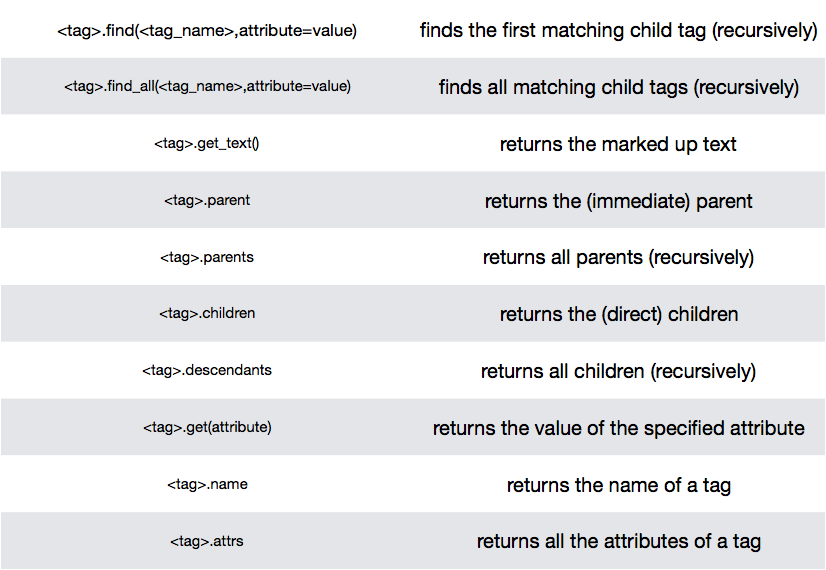

<h1>A function that returns a list containing recipe names, recipe descriptions (if any) and recipe urls</h1>


<li>We want to create a list of recipes and links to the recipes
<li>We need to figure out how to ‘programmatically’ extract each recipe name and recipe link

<li>Search for the tag with a unique attribute value that identifies recipes and recipe links
<li>We’ll look at the a (annotate) tags because clickable links are in a tags

<h3>We'll write two functions for this</h3>
<li><b>get_recipes(keywords)</b>: That takes a string containing keywords and returns the list of recipes
<li><b>get_recipe_info(recipe_link)</b>: That takes a link to a recipe page and returns three values:
<ol>
<li>description: the description associated with the recipe
<li>ingredients: a list of all ingredients required
<li>preparation: a list containing the preparation steps
</ol>


In [19]:
def get_recipes(keywords):
    import requests
    from bs4 import BeautifulSoup
    recipe_list = list()
    url = "http://www.epicurious.com/search/" + keywords
    page = requests.get(url)
    soup = BeautifulSoup(page.content,'lxml')
    recipes = soup.find_all('article',class_='recipe-content-card')
    for recipe in recipes:
        a_tag = recipe.find('a')
        name = a_tag.get_text()
        link = 'http://www.epicurious.com' + a_tag.get('href')
        description,ingredients,preparation = get_recipe_info(link) 
        recipe_list.append((name,description,ingredients,preparation))
    return recipe_list

get_recipes("Chicken Basil")

[('Provencal Chicken with Tomatoes, Olives, and Basil',
  'Serve with some crusty bread.',
  ['8 chicken thighs with skin and bone (about 2 1/2 pounds)',
   '1 tablespoon extra-virgin olive oil',
   '3 garlic cloves, minced',
   '1 1/2 pounds plum tomatoes, seeded, diced (about 3 cups)',
   '1/3 cup dry white wine',
   '4 anchovy fillets, minced',
   '1/3 cup Niçoise olives, pitted, or 1/3 cup Kalamata olives, pitted, halved',
   '1/4 cup thinly sliced fresh basil leaves or purple basil leaves',
   '1 1/2 tablespoons chopped drained capers'],
  ['Sprinkle chicken with salt and pepper. Heat oil in heavy large skillet over high heat. Add chicken, skin side down. Reduce heat to medium-high; cook until golden, about 5 minutes per side. Transfer chicken to platter. Pour off all but 1 1/2 tablespoons drippings. Cool skillet 2 minutes; return to low heat. Add garlic; sauté 1 minute. Add tomatoes and wine. Increase heat to medium; bring to simmer, scraping up any browned bits. Cook until tomat

In [18]:
def get_recipe_info(recipe_link):
    ingredient_list = list()
    preparation_list = list()
    import requests
    from bs4 import BeautifulSoup
    page = requests.get(recipe_link)
    soup = BeautifulSoup(page.content,'lxml')
    description = soup.find('div',itemprop='description').get_text()
    ingredients = soup.find_all('li',class_='ingredient')
    for ingredient in ingredients:
        ingredient_list.append(ingredient.get_text())
    prep_steps = soup.find_all('li',class_='preparation-step')
    for prep in prep_steps:
        preparation_list.append(prep.get_text().strip())
    return description,ingredient_list,preparation_list

get_recipe_info('https://www.epicurious.com/recipes/food/views/chicken-in-pineapple-sauce-hamonado')

('Pineapple fans should definitely try this chicken hamonado dish. Pineapple is the main ingredient in this saucy Filipino dish and makes the chicken sweet, tender and tasty. Pork can also be used to make hamonado, but this chicken version is my favorite!',
 ['3 lb (1.3 kg) chicken pieces of your choice (thighs, drumsticks or wings)',
  '2 tbsp (30 ml) fish sauce',
  '1 tbsp (15 ml) lemon juice',
  '1 tsp freshly ground black pepper, plus more to taste',
  '2 tbsp (30 ml) vegetable oil',
  '4 cloves garlic, chopped',
  '1 small onion, chopped',
  '1 cup (240 ml) unsweetened pineapple juice',
  '2 tbsp (25 g) sugar',
  '2 tbsp (30 ml) soy sauce',
  '1 (14-oz [398-ml]) can pineapple chunks with juice',
  'Salt, to taste',
  'Steamed rice, for serving'],
 ['In a large bowl, combine the chicken pieces with the fish sauce, lemon juice and pepper; toss to combine. Cover with plastic wrap and refrigerate for at least an hour. Drain the chicken and discard the marinade.',
  'Heat the oil in a 

<h3>This is our workspace for the functions!</h3>

In [8]:
import requests
from bs4 import BeautifulSoup
recipe_list = list()
url = "http://www.epicurious.com/search/" + "Chicken"
page = requests.get(url)
soup = BeautifulSoup(page.content,'lxml')
recipes = soup.find_all('article',class_='recipe-content-card')

for recipe in recipes:
    a_tag = recipe.find('a')
    name = a_tag.get_text()
    link = 'http://www.epicurious.com' + a_tag.get('href')
    print(name,link)

Chicken in Pineapple Sauce  http://www.epicurious.com/recipes/food/views/chicken-in-pineapple-sauce-hamonado
Chicken Cobb Salad http://www.epicurious.com/recipes/food/views/chicken-cobb-salad
Weeknight Tandoori Chicken http://www.epicurious.com/recipes/food/views/weeknight-tandoori-chicken


In [13]:
def foo(a,b):
    return a+b

foo(b=3,c=4)

TypeError: foo() got an unexpected keyword argument 'c'

In [16]:
soup.find_all('article',{'class':'recipe-content-card','data-has-quickview':"false"})

[<article class="recipe-content-card" data-has-quickview="false" data-index="14" data-reactid="250" itemscope="" itemtype="https://schema.org/Recipe"><header class="summary" data-reactid="251"><strong class="tag" data-reactid="252">recipe</strong><h4 class="hed" data-reactid="253" data-truncate="3" itemprop="name"><a data-reactid="254" href="/recipes/food/views/chicken-in-pineapple-sauce-hamonado">Chicken in Pineapple Sauce </a></h4><p class="dek" data-reactid="255" data-truncate="1">Pineapple is the main ingredient in this saucy Filipino dish and makes the chicken sweet, tender and tasty.</p><dl class="recipes-ratings-summary" data-reactid="256" data-reviews-count="0" data-reviews-rating="0" itemprop="aggregateRating" itemscope="" itemtype="https://schema.org/AggregateRating"><dt class="rating-label" data-reactid="257">Average user rating</dt><span class="reviews-count-container" data-reactid="258"><dd class="rating" data-rating="unrated" data-reactid="259"><span data-reactid="260" it

<h1>Logging in to a web server</h1>

<li>Figure out the login url 
<li>https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page
<li>Look for the login form in the html source
<li>form_tag = page_soup.find('form')
<li>Look for ALL the inputs in the login form (some may be tricky!)
<li>input_tags = form_tag.find_all('input')
<li>Create a Python dict object with key,value pairs for each input
<li>Use requests.session to create an open session object
<li>Send the login request (POST)
<li>Send followup requests keeping the sessions object open

<h2>Get username and password</h2>
<li>Best to store in a file for reuse
<li>You will need to set up your own login and password and place them in a file called wikidata.txt
<li>Line one of the file should contain your username
<li>Line two your password

In [20]:
with open('/Users/hardeepjohar/Documents/Courses/Fall2018/API_KEYS/wikidata.txt') as f:
    contents = f.read().split('\n')
    username = contents[0]
    password = contents[1]


<h3>Construct an object that contains the data to be sent to the login page</h3>

In [21]:

payload = {
    'wpName': username,
    'wpPassword': password,
    'wploginattempt': 'Log in',
    'wpEditToken': "+\\",
    'title': "Special:UserLogin",
    'authAction': "login",
    'force': "",
    'wpForceHttps': "1",
    'wpFromhttp': "1",
    #'wpLoginToken': ‘', #We need to read this from the page
    }

<h3>get the value of the login token</h3>

In [23]:
def get_login_token(response):
    soup = BeautifulSoup(response.text, 'lxml')
    token = soup.find('input',{'name':"wpLoginToken"}).get('value')
    return token


<h3>Setup a session, login, and get data</h3>

In [24]:
import requests
from bs4 import BeautifulSoup
with requests.session() as s:
    response = s.get('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page')
    payload['wpLoginToken'] = get_login_token(response)
    #Send the login request
    response_post = s.post('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&action=submitlogin&type=login',
                           data=payload)
    #Get another page and check if we’re still logged in
    response = s.get('https://en.wikipedia.org/wiki/Special:Watchlist')
    data = BeautifulSoup(response.content,'lxml')
    print(data.find('div',class_='mw-changeslist').get_text())

List of abbreviations (help):
r
Edit flagged by ORES
N
New page
m
Minor edit
b
Bot edit
D
Edit made at Wikidata
(±123)
Page size change in bytes

24 September 2018
(diff | hist) . . Big Bang‎; 13:35 . . (+270)‎  . . ‎Waddie96 (talk | contribs)‎ (Filled in 4 bare reference(s) with reFill ())
(diff | hist) . . m Talk:Main Page‎; 13:19 . . (-6)‎  . . ‎JarrahTree (talk | contribs)‎ (Reverted edits by 82.219.28.37 (talk) to last version by Martinevans123) (Tag: Rollback)


